In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dfc = pd.read_csv("../results/cleaned_query_responses_newsep", sep="$")
df = pd.read_csv("../results/exp_3_no_clean_no_int_fulldev.csv")

In [44]:
na_idx = dfc[dfc["query"] == "na"].index

In [55]:
df.loc[na_idx, "score"] = 0

In [57]:
dfc.loc[na_idx, "score"] = 0

In [61]:
clean_scores = dfc["score"]
dirty_scores = df["score"]

C:\Users\Julius\miniconda3\envs\fdn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Julius\miniconda3\envs\fdn\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


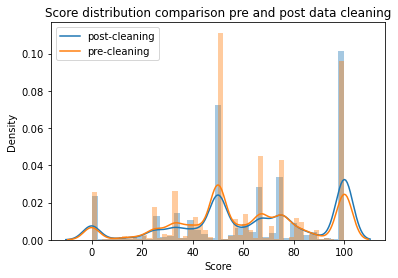

In [63]:
sns.distplot(clean_scores)
sns.distplot(dirty_scores)
plt.legend(["post-cleaning", "pre-cleaning"])
plt.xlabel("Score")
plt.title("Score distribution comparison pre and post data cleaning")
plt.savefig("../results/score_dist_pre_post_clean.png")

In [64]:
dfc_nona = dfc[dfc["query"] != "na"]

In [69]:
len_dfc_nona = dfc_nona["query"].apply(len)

In [71]:
scr_dfc_nona = dfc_nona["score"]

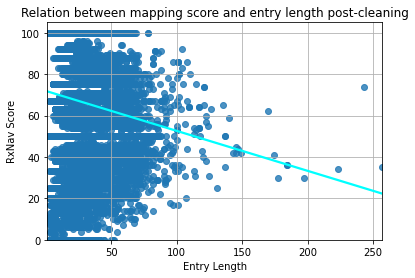

In [75]:
plt.title("Relation between mapping score and entry length post-cleaning")
plt.xlabel("Entry Length")
plt.ylabel("RxNav Score")
# plt.scatter(sorted_with_idx_query_lengths.to_list(), matching_scores.to_list())
plt.grid()
plt.ylim(0, 105)
sns.regplot(x=len_dfc_nona.to_list(), y=scr_dfc_nona.to_list(), line_kws={'color':'cyan'}, ci=None)
plt.savefig("../results/figures/relation_score_entry_len_postclean.png")
# plt.text("a")
plt.show()

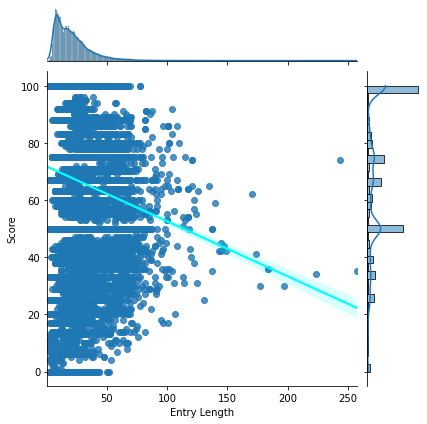

In [82]:
dfc_nona_data = pd.DataFrame(data={"Entry Length":len_dfc_nona.to_list(), "Score":scr_dfc_nona.to_list()})
sns.jointplot(x="Entry Length", y="Score", data=dfc_nona_data, kind="reg", line_kws={'color':'cyan'})
# plt.title("Joint plot showing the distribution ")
plt.savefig("../results/score_len_relation_joint_postclean.png")
plt.show()

In [83]:
import scipy

corr = scipy.stats.pearsonr(x=len_dfc_nona.to_numpy(), y=scr_dfc_nona.to_numpy())
print(corr)

(-0.1053398573345914, 4.127878692692362e-117)


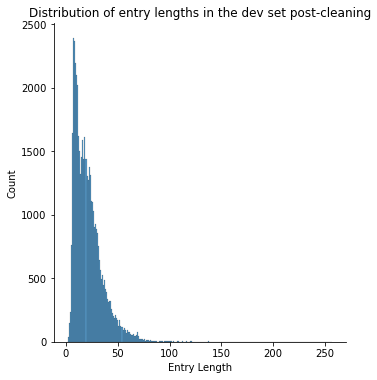

In [78]:
sns.displot(len_dfc_nona.to_list())
plt.title("Distribution of entry lengths in the dev set post-cleaning")
plt.xlabel("Entry Length")
plt.savefig("../results/figures/dev_set_entry_len_dist_postclean.png")
plt.show()